# Import packages

In [1]:
import pandas as pd
import ml_help
from sklearn.model_selection import train_test_split
plot_label="Volume"

# Load and prepare data

In [3]:
count_df = pd.read_csv("./data/yonge_count.csv.zip")
weather_df = pd.read_csv("./data/weather_data.csv.zip")

In [4]:
count_df["time"] = pd.to_datetime(count_df["time"],utc=True)
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)

In [5]:
count_df.drop(['month', 'day', 'day_of_week', 'hour', 'minute', 'location'],inplace=True,axis=1)
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute', 'windDegree'],inplace=True,axis=1)

## Merge flow and weather sets

In [6]:
df = count_df.merge(weather_df,left_on="time", right_on="collectedAt", how="inner")
df.head()

,time,total_count,dist_from_mid_point,is_north_from_mid_point,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-08-11 07:45:00+00:00,204,0.544386,0,10.0,2022-08-11 07:45:00+00:00,20.94,21.05,75,2.57,75,0.0,0.0,1,0,0,0,0
1,2022-08-11 07:45:00+00:00,175,0.920430,0,10.0,2022-08-11 07:45:00+00:00,20.94,21.05,75,2.57,75,0.0,0.0,1,0,0,0,0
2,2022-08-11 07:45:00+00:00,174,0.775626,0,10.0,2022-08-11 07:45:00+00:00,20.94,21.05,75,2.57,75,0.0,0.0,1,0,0,0,0
3,2022-08-11 08:00:00+00:00,213,0.544386,0,10.0,2022-08-11 08:00:00+00:00,20.98,21.04,73,2.57,75,0.0,0.0,1,0,0,0,0
4,2022-08-11 08:00:00+00:00,213,0.920430,0,10.0,2022-08-11 08:00:00+00:00,20.98,21.04,73,2.57,75,0.0,0.0,1,0,0,0,0


## Extract data from collectedAt

In [7]:
df["month"] = df.time.dt.month
df["day_of_week"] = df.time.dt.weekday
df["hour"] = df.time.dt.hour
df["minute"] = df.time.dt.minute
df.drop("time",inplace=True,axis=1)
df.drop("collectedAt",inplace=True,axis=1)
df.head()

,total_count,dist_from_mid_point,is_north_from_mid_point,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,...,cloudy,clear,atmosphere,snowy,rainy,month,day,day_of_week,hour,minute
0,204,0.544386,0,10.0,20.94,21.05,75,2.57,75,0.0,...,1,0,0,0,0,8,11,3,7,45
1,175,0.920430,0,10.0,20.94,21.05,75,2.57,75,0.0,...,1,0,0,0,0,8,11,3,7,45
2,174,0.775626,0,10.0,20.94,21.05,75,2.57,75,0.0,...,1,0,0,0,0,8,11,3,7,45
3,213,0.544386,0,10.0,20.98,21.04,73,2.57,75,0.0,...,1,0,0,0,0,8,11,3,8,0
4,213,0.920430,0,10.0,20.98,21.04,73,2.57,75,0.0,...,1,0,0,0,0,8,11,3,8,0


In [8]:
categorical_attrs = ["month", "day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs)
transformed_df = transformed_df.astype("float32")
transformed_df.head()

,total_count,dist_from_mid_point,is_north_from_mid_point,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,...,day,hour,minute,month_8,month_9,month_10,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_5
0,204.0,0.544386,0.0,10.0,20.940001,21.049999,75.0,2.57,75.0,0.0,...,11.0,7.0,45.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,175.0,0.920430,0.0,10.0,20.940001,21.049999,75.0,2.57,75.0,0.0,...,11.0,7.0,45.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,174.0,0.775626,0.0,10.0,20.940001,21.049999,75.0,2.57,75.0,0.0,...,11.0,7.0,45.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,213.0,0.544386,0.0,10.0,20.980000,21.040001,73.0,2.57,75.0,0.0,...,11.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,213.0,0.920430,0.0,10.0,20.980000,21.040001,73.0,2.57,75.0,0.0,...,11.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Split data set into train and test

In [9]:
X = transformed_df.drop("total_count",axis=1)
y = transformed_df["total_count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## Sample 50% of remaining training data to run CV.
- The idea is have enough data that is representative of the dataset, while speeding up the CV performed by GridSearchCV.

In [10]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Show model metrics to determine what algorithms to run

In [11]:
metrics = pd.read_csv("./metrics/072_initial_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.909910,18.315908,856.732800,29.269999,0.072156,0.094989,0.002000
1,Random Forest,0.908326,19.713520,871.801822,29.526290,0.078849,0.571213,0.012304
2,Decision Tree,0.891312,23.813520,1033.599068,32.149636,0.087307,0.007540,0.000813
3,Linear Regression,0.172425,70.510185,7870.069000,88.713410,0.252538,0.005055,0.000979
4,Lasso,0.171103,70.664650,7882.638000,88.784225,0.253795,0.033809,0.001000
5,Elastic Net,0.163374,72.151370,7956.135000,89.197170,0.260083,0.002001,0.001050
6,MLP,0.114343,73.747460,8422.411000,91.773700,0.262438,1.090507,0.003002
7,Logistic Regression,-0.261382,78.116550,11995.482000,109.523890,0.263943,1.022294,0.003004


# Run ML tasks

## Random Forest

Testing 243 param combinations for Random Forest. CV=5. Total fits: 1215

Searching space...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Searching space... OK! Took 217.46790528297424 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 1.2990012168884277 seconds

model Random Forest
r2 0.9028419555260151
mae 20.780195130489663
mse 923.9527920879275
rmse 30.39659178407881
mape 0.08398285605239646
time_to_fit 1.2990012168884277
time_to_predict 0.036681175231933594

Dumping model...
Dumping model... OK! Took 0.9410593509674072 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


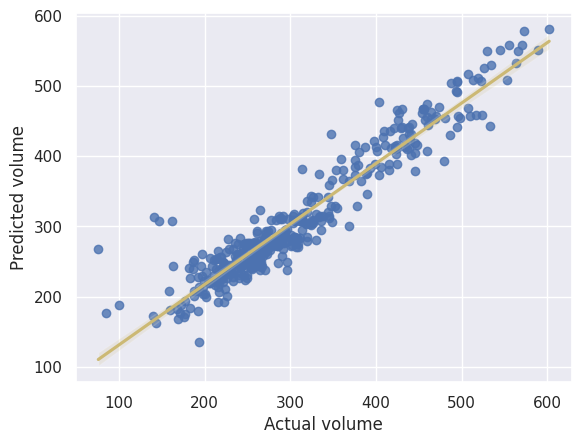

In [12]:
from sklearn.ensemble import RandomForestRegressor

file_name = "073_random_forest"
model_name = "Random Forest"

param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [16,32,48],
    "max_leaf_nodes": [10,50,100],
    "min_samples_leaf": [1,5,10],
    "min_samples_split": [2,8,16]
}

estimator = RandomForestRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## Decision Tree

Testing 750 param combinations for Decision Tree. CV=5. Total fits: 3750

Searching space...
Fitting 5 folds for each of 750 candidates, totalling 3750 fits
Searching space... OK! Took 3.9816672801971436 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 0.005167961120605469 seconds

model Decision Tree
r2 0.9118647366271646
mae 22.20076518938411
mse 838.1480207389379
rmse 28.9507861851615
mape 0.0865616050921179
time_to_fit 0.005167961120605469
time_to_predict 0.0004124641418457031

Dumping model...
Dumping model... OK! Took 0.0033452510833740234 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


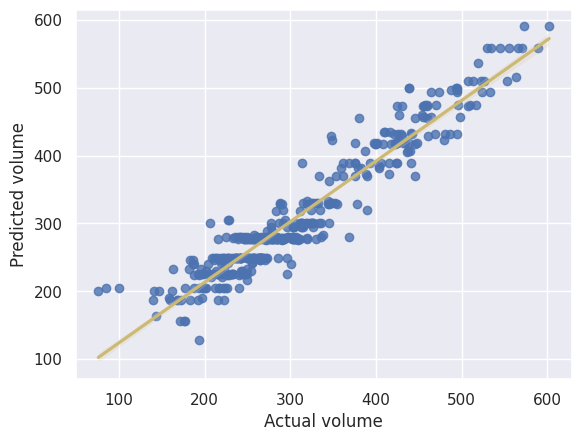

In [13]:
from sklearn.tree import DecisionTreeRegressor

file_name = "073_decision_tree"
model_name = "Decision Tree"

param_grid = {
    "random_state": [42],
    "criterion": ["squared_error"],
    "splitter": ["best"],
    "max_depth": [6,8,16,32,64,128],
    "min_samples_split": [2,4,8,16,32],
    "min_samples_leaf": [1,5,10,15,30],
    "max_leaf_nodes": [10,30,50,75,100]
}

estimator = DecisionTreeRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test_sk(file_name, model_name, DecisionTreeRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## XGBoost

Testing 243 param combinations for XGBoost. CV=5. Total fits: 1215

Searching space...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Searching space... OK! Took 643.2970433235168 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 0.5463154315948486 seconds

model XGBoost
r2 0.9320510665197383
mae 17.850832
mse 646.18024
rmse 25.420076
mape 0.06763208
time_to_fit 0.5463154315948486
time_to_predict 0.0054721832275390625

Dumping model...
Dumping model... OK! Took 0.06797933578491211 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


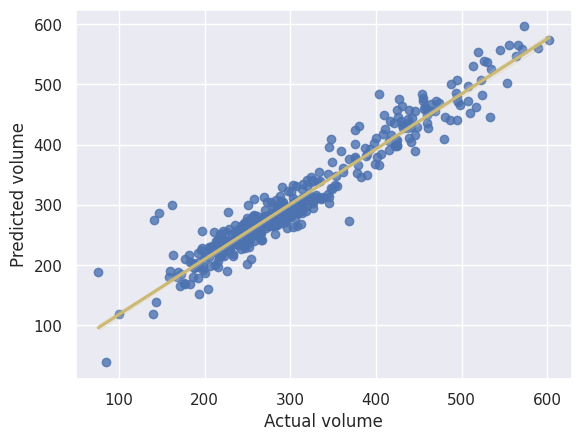

In [14]:
import xgboost as xgb

file_name = "073_xgboost"
model_name = "XGBoost"

param_grid = {
    "random_state": [42],
    "objective": ["reg:squarederror"],
    "tree_method": ["hist"],
    "predictor": ["cpu_predictor"],
    "num_parallel_tree": [10],
    "max_depth": [6, 8, 16],
    "n_estimators": [100, 250, 350],
    "max_leaves": [20, 40, 80],
    "alpha": [0.01, 0.1, 1],
    "learning_rate": [0.3, 0.5, 0.9]
}

estimator = xgb.XGBRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)
    
model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## MLP

Testing 216 param combinations for MLP. CV=5. Total fits: 1080

Searching space...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Searching space... OK! Took 177.9659776687622 seconds
Storing best params...
Storing best params... OK
Fitting model...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model... OK! Took 6.301412582397461 seconds

model MLP
r2 0.2528914222425156
mae 68.29729
mse 7104.8467
rmse 84.29025
mape 0.23953848
time_to_fit 6.301412582397461
time_to_predict 0.0013155937194824219

Dumping model...
Dumping model... OK! Took 0.037929534912109375 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


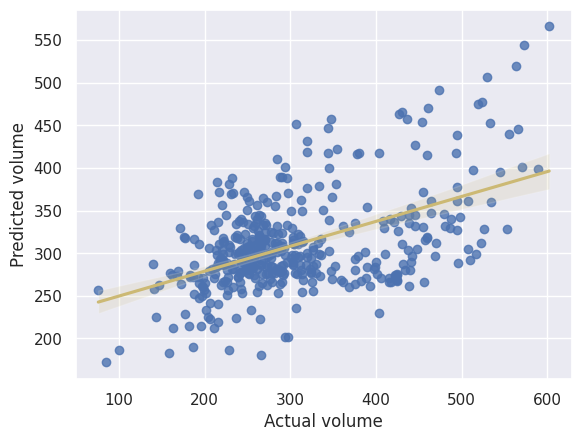

In [15]:
from sklearn.neural_network import MLPRegressor

file_name = "073_mlpr"
model_name = "MLP"

param_grid = {
    "random_state": [42],
    "hidden_layer_sizes": [(100), (100,50), (100,50,25)],
    "alpha": [0.0001, 0.001, 0.1],
    "learning_rate_init": [0.001, 0.1],
    "max_iter": [500, 600, 700],
    "tol": [1e-4],
    "epsilon": [1e-8, 1e-4],
    "n_iter_no_change": [3, 10]
}

estimator = MLPRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train